In [1]:
%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
  Using cached MarkupSafe-2.1.5-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/376.9 MB 7.8 MB/s eta 0:00:49
   ---------------------------------------- 0.7/376.9 MB 7.8 MB/s eta 0:00:48
   ---------------------------------------- 1.2/376.9 MB 8.5 MB/s eta 0:00:45
   ---------------------------------------- 1.7/376.9 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 2.3/376.9 MB 9.6 MB/s eta 0:00:40
   ---------------------------------------- 2.8/376.9 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 3.5/376.9 MB 10.5 MB/s eta 0:00:36
   ---------------------------------------- 4.0/376.9 MB 10.6 MB/s eta 0:00:36
   ---------------------------------------- 4.5/376.9 MB 11.1 MB/s eta 0:0

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [18]:
dpath = 'C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/파생변수 Data set/'

# 연령별 사고율

## 20대 사고율

In [19]:
df_20 = pd.read_csv(dpath+'20대 사고율.csv')

In [20]:
df_20.shape

(84, 2)

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

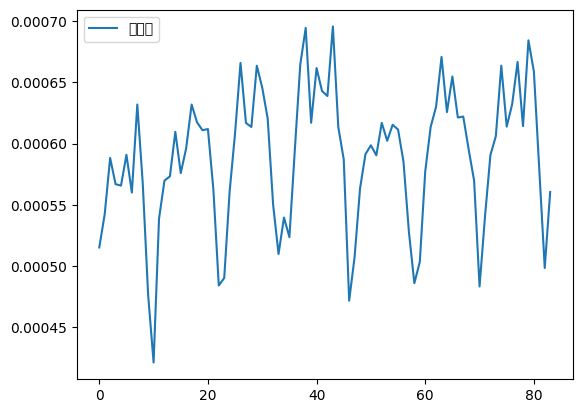

In [6]:
df_20.plot()

In [21]:
df_20 = df_20.sort_index(ascending = False)
df_20 = df_20.reset_index()
#df_20.head()

In [22]:
df_20.drop('index',axis = 1, inplace=True)
df_20.head()

,시간,사고율
0,2016-01-01,0.000561
1,2016-02-01,0.000498
2,2016-03-01,0.000578
3,2016-04-01,0.000659
4,2016-05-01,0.000684


In [9]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_20['사고율'].values.reshape(-1, 1))

In [10]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [12]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [13]:
print(split)

54


In [14]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length-1, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# 모델 훈련
# EPOCH와 LEARNING RATE를 조절
epochs = 1000  # 원하는 epoch로 변경
learning_rate = 0.001  # 원하는 learning rate로 변경

# Adam optimizer를 직접 만들어서 learning rate를 설정할 수 있습니다.
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mse')

In [16]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - loss: 0.4174 - val_loss: 0.4036
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3876 - val_loss: 0.3702
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3439 - val_loss: 0.3341
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3122 - val_loss: 0.2939
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2853 - val_loss: 0.2496
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2347 - val_loss: 0.2011
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1868 - val_loss: 0.1477
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1396 - val_loss: 0.0904
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0842 - val_loss: 0.0360
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0571 - val_loss: 0.0056
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0506 - val_loss: 0.0165
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 31ms/step - loss: 0.0648
Mean Squared Error on Test Data: 0.06484890729188919


In [ ]:
'''# 예측 수행
predictions = model.predict(X_test)'''

'# 예측 수행\npredictions = model.predict(X_test)'

In [ ]:
'''# 역정규화
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))'''

'# 역정규화\ny_test = scaler.inverse_transform(y_test.reshape(-1, 1))\npredictions = scaler.inverse_transform(predictions.reshape(-1, 1))'

In [ ]:
'''# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()'''

"# 결과 시각화\nplt.figure(figsize=(12, 6))\nplt.plot(y_test, label='True Values')\nplt.plot(predictions, label='Predictions')\nplt.legend()\nplt.show()"

In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 357ms/step
다음 달의 예측 값: 0.0005994708


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'20대': [predicted_value[0, 0]]})

# CSV 파일로 저장
predicted_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 30대 사고율

In [ ]:
df_30 = pd.read_csv(dpath+'30대 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

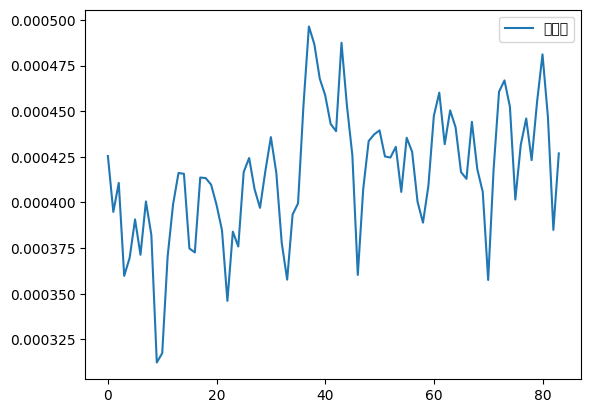

In [ ]:
df_30.plot()

In [ ]:
df_30 = df_30.sort_index(ascending = False)
df_30 = df_30.reset_index()
#df_20.head()

In [ ]:
df_30.drop('index',axis = 1, inplace=True)
df_30.head()

,시간,사고율
0,2016-01-01,0.000427
1,2016-02-01,0.000385
2,2016-03-01,0.000447
3,2016-04-01,0.000481
4,2016-05-01,0.000455


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_30['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.0204 - val_loss: 0.0198
Epoch 2/1000
2/2 [==============================] - 0s 78ms/step - loss: 0.0217 - val_loss: 0.0138
Epoch 3/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0290 - val_loss: 0.0191
Epoch 4/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0460 - val_loss: 0.0577
Epoch 5/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0386 - val_loss: 0.0529
Epoch 6/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0443 - val_loss: 0.0427
Epoch 7/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0271 - val_loss: 0.0163
Epoch 8/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0239 - val_loss: 0.0350
Epoch 9/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0296 - val_loss: 0.0390
Epoch 10/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0247 - val_loss: 0.0068
Epoch 11

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 33ms/step - loss: 0.1545
Mean Squared Error on Test Data: 0.15449842810630798


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 22ms/step
다음 달의 예측 값: 0.00046822042


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'30대': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 40대 사고율

In [ ]:
df_40 = pd.read_csv(dpath+'40대 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

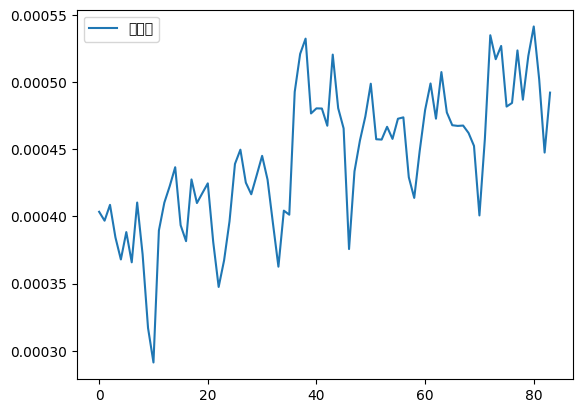

In [ ]:
df_40.plot()

In [ ]:
df_40 = df_40.sort_index(ascending = False)
df_40 = df_40.reset_index()
#df_20.head()

In [ ]:
df_40.drop('index',axis = 1, inplace=True)
df_40.head()

,시간,사고율
0,2016-01-01,0.000492
1,2016-02-01,0.000448
2,2016-03-01,0.000502
3,2016-04-01,0.000542
4,2016-05-01,0.000520


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_40['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 97ms/step - loss: 0.0183 - val_loss: 0.1581
Epoch 2/1000
2/2 [==============================] - 0s 70ms/step - loss: 0.0188 - val_loss: 0.0780
Epoch 3/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0221 - val_loss: 0.0604
Epoch 4/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0167 - val_loss: 0.1099
Epoch 5/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.0121 - val_loss: 0.0564
Epoch 6/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.0130 - val_loss: 0.0545
Epoch 7/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0130 - val_loss: 0.0639
Epoch 8/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0113 - val_loss: 0.0400
Epoch 9/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0114 - val_loss: 0.0366
Epoch 10/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.0114 - val_loss: 0.0549
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 32ms/step - loss: 0.3305
Mean Squared Error on Test Data: 0.3305363655090332


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 25ms/step
다음 달의 예측 값: 0.00058556726


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'40대': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 50대 사고율

In [ ]:
df_50 = pd.read_csv(dpath+'50대 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

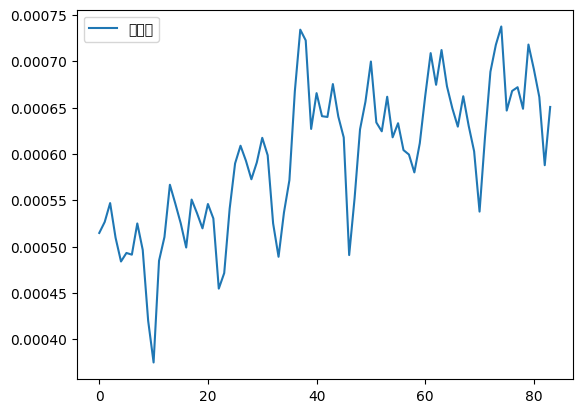

In [ ]:
df_50.plot()

In [ ]:
df_50 = df_50.sort_index(ascending = False)
df_50 = df_50.reset_index()
#df_20.head()

In [ ]:
df_50.drop('index',axis = 1, inplace=True)
df_50.head()

,시간,사고율
0,2016-01-01,0.000651
1,2016-02-01,0.000588
2,2016-03-01,0.000661
3,2016-04-01,0.000691
4,2016-05-01,0.000718


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_50['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.0088 - val_loss: 0.1405
Epoch 2/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.0080 - val_loss: 0.2198
Epoch 3/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0085 - val_loss: 0.1277
Epoch 4/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0067 - val_loss: 0.1214
Epoch 5/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0065 - val_loss: 0.1961
Epoch 6/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0060 - val_loss: 0.1686
Epoch 7/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0055 - val_loss: 0.1224
Epoch 8/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0055 - val_loss: 0.1446
Epoch 9/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0056 - val_loss: 0.1439
Epoch 10/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.0053 - val_loss: 0.1290
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 35ms/step - loss: 1.7474
Mean Squared Error on Test Data: 1.747405767440796


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 25ms/step
다음 달의 예측 값: 0.0016881045


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'50대': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## ~64세 사고율

In [ ]:
df_64 = pd.read_csv(dpath+'~64세 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

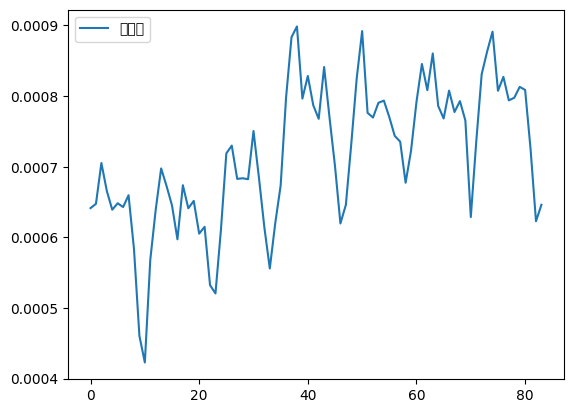

In [ ]:
df_64.plot()

In [ ]:
df_64 = df_64.sort_index(ascending = False)
df_64 = df_64.reset_index()
#df_20.head()

In [ ]:
df_64.drop('index',axis = 1, inplace=True)
df_64.head()

,시간,사고율
0,2016-01-01,0.000646
1,2016-02-01,0.000623
2,2016-03-01,0.000725
3,2016-04-01,0.000809
4,2016-05-01,0.000813


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_64['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 102ms/step - loss: 0.0123 - val_loss: 0.2116
Epoch 2/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0170 - val_loss: 0.2746
Epoch 3/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.0182 - val_loss: 0.2434
Epoch 4/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.0151 - val_loss: 2.1828
Epoch 5/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0173 - val_loss: 0.0121
Epoch 6/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0468 - val_loss: 0.0355
Epoch 7/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.0306 - val_loss: 0.0393
Epoch 8/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0292 - val_loss: 0.0731
Epoch 9/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.0364 - val_loss: 0.0687
Epoch 10/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.0267 - val_loss: 0.0422
Epoch 11

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 29ms/step - loss: 0.1181
Mean Squared Error on Test Data: 0.11814296245574951


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 24ms/step
다음 달의 예측 값: 0.00091981


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'64세': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 노인 사고율

In [ ]:
df_se = pd.read_csv(dpath+'노인 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

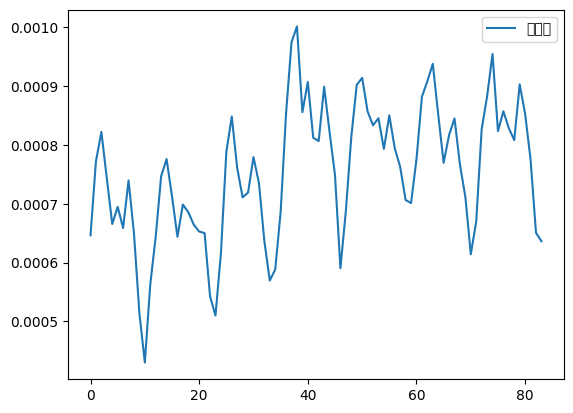

In [ ]:
df_se.plot()

In [ ]:
df_se = df_se.sort_index(ascending = False)
df_se = df_se.reset_index()
#df_20.head()

In [ ]:
df_se.drop('index',axis = 1, inplace=True)
df_se.head()

,시간,사고율
0,2016-01-01,0.000636
1,2016-02-01,0.000651
2,2016-03-01,0.000775
3,2016-04-01,0.000853
4,2016-05-01,0.000903


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_se['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0244 - val_loss: 0.0157
Epoch 2/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0179 - val_loss: 0.0126
Epoch 3/1000
2/2 [==============================] - 0s 82ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 4/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.0125 - val_loss: 0.0138
Epoch 5/1000
2/2 [==============================] - 0s 94ms/step - loss: 0.0111 - val_loss: 0.0171
Epoch 6/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.0122 - val_loss: 0.0174
Epoch 7/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.0127 - val_loss: 0.0168
Epoch 8/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0116 - val_loss: 0.0189
Epoch 9/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0113 - val_loss: 0.0193
Epoch 10/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0106 - val_loss: 0.0182
Epoch 1

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 32ms/step - loss: 0.0600
Mean Squared Error on Test Data: 0.06002744659781456


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-15:]
input_data = np.array(last_five_values).reshape((1, 15, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 25ms/step
다음 달의 예측 값: 0.0009506257


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'노인': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

# 성별 사고율

## 남성 사고율

In [ ]:
df_m = pd.read_csv(dpath+'남성 사고율.csv')

In [ ]:
df_m.shape

(9, 2)

In [ ]:
df_m = df_m.sort_index(ascending = False)
df_m = df_m.reset_index()
#df_20.head()

In [ ]:
df_m.drop('index',axis = 1, inplace=True)
df_m.head()

,시간,사고율
0,2014,0.041962
1,2015,0.041687
2,2016,0.040964
3,2017,0.040731
4,2018,0.043316


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_m['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.1302 - val_loss: 0.9885
Epoch 2/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.1284 - val_loss: 0.9782
Epoch 3/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.1256 - val_loss: 0.9652
Epoch 4/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.1221 - val_loss: 0.9502
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1182 - val_loss: 0.9338
Epoch 6/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.1140 - val_loss: 0.9165
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1097 - val_loss: 0.9014
Epoch 8/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.1054 - val_loss: 0.8874
Epoch 9/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.1013 - val_loss: 0.8731
Epoch 10/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0973 - val_loss: 0.8589
Epoch 11/10

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 31ms/step - loss: 0.0224
Mean Squared Error on Test Data: 0.022351879626512527


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 310ms/step
다음 달의 예측 값: 0.07188177


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'남성': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 여성 사고율

In [ ]:
df_w = pd.read_csv(dpath+'여성 사고율.csv')

In [ ]:
df_w.shape

(9, 2)

In [ ]:
df_w = df_w.sort_index(ascending = False)
df_w = df_w.reset_index()
#df_20.head()

In [ ]:
df_w.drop('index',axis = 1, inplace=True)
df_w.head()

,시간,사고율
0,2014,0.025056
1,2015,0.024793
2,2016,0.024581
3,2017,0.023881
4,2018,0.024210


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_w['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 92ms/step - loss: 0.1748 - val_loss: 0.7483
Epoch 2/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.1721 - val_loss: 0.7408
Epoch 3/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1679 - val_loss: 0.7310
Epoch 4/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1623 - val_loss: 0.7195
Epoch 5/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1557 - val_loss: 0.7066
Epoch 6/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.1484 - val_loss: 0.6925
Epoch 7/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.1404 - val_loss: 0.6772
Epoch 8/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.1318 - val_loss: 0.6610
Epoch 9/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.1228 - val_loss: 0.6439
Epoch 10/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.1136 - val_loss: 0.6261
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 27ms/step - loss: 0.2424
Mean Squared Error on Test Data: 0.24243532121181488


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 23ms/step
다음 달의 예측 값: 0.029610407


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'여성': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

# 약관별 사고율

## 특약 부부운전 사고율

In [ ]:
df = pd.read_csv(dpath+'특약 부부운전 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

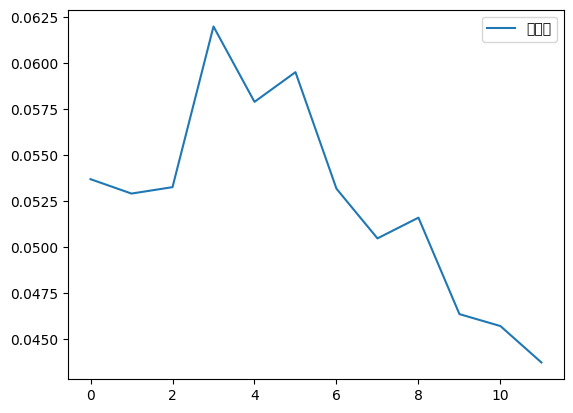

In [ ]:
df.plot()

In [ ]:
df.shape

(12, 2)

In [ ]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [ ]:
df.drop('index',axis = 1, inplace=True)
df.head()

,시간,사고율
0,2011-01-01,0.043751
1,2012-01-01,0.045726
2,2013-01-01,0.046374
3,2014-01-01,0.051606
4,2015-01-01,0.050481


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 103ms/step - loss: 0.1671 - val_loss: 0.1422
Epoch 2/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.1497 - val_loss: 0.1358
Epoch 3/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.1284 - val_loss: 0.1274
Epoch 4/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.1077 - val_loss: 0.1171
Epoch 5/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0888 - val_loss: 0.1054
Epoch 6/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0728 - val_loss: 0.0927
Epoch 7/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0600 - val_loss: 0.0792
Epoch 8/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0503 - val_loss: 0.0656
Epoch 9/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0424 - val_loss: 0.0521
Epoch 10/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0373 - val_loss: 0.0394
Epoch 11

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 27ms/step - loss: 0.2103
Mean Squared Error on Test Data: 0.2102915644645691


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 24ms/step
다음 달의 예측 값: 0.074897386


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'특약 부부운전': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 특약 미가입 사고율

In [ ]:
df = pd.read_csv(dpath+'특약 미가입 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

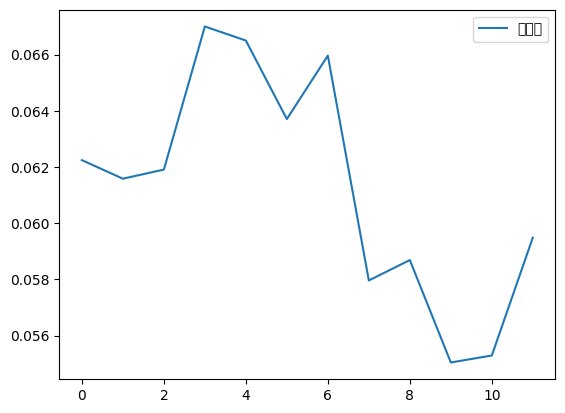

In [ ]:
df.plot()

In [ ]:
df.shape

(12, 2)

In [ ]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [ ]:
df.drop('index',axis = 1, inplace=True)
df.head()

,시간,사고율
0,2011-01-01,0.059485
1,2012-01-01,0.055291
2,2013-01-01,0.055043
3,2014-01-01,0.058688
4,2015-01-01,0.057963


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 109ms/step - loss: 0.0919 - val_loss: 0.0043
Epoch 2/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0823 - val_loss: 0.0050
Epoch 3/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0737 - val_loss: 0.0074
Epoch 4/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0670 - val_loss: 0.0121
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0590 - val_loss: 0.0188
Epoch 6/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0518 - val_loss: 0.0265
Epoch 7/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0472 - val_loss: 0.0335
Epoch 8/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.0456 - val_loss: 0.0386
Epoch 9/1000
1/1 [==============================] - 0s 82ms/step - loss: 0.0470 - val_loss: 0.0411
Epoch 10/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0481 - val_loss: 0.0410
Epoch 11

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 28ms/step - loss: 0.1912
Mean Squared Error on Test Data: 0.191230908036232


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 23ms/step
다음 달의 예측 값: 0.07603433


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'특약 미가입': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 특약 기타 사고율

In [ ]:
df = pd.read_csv(dpath+'특약 기타 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

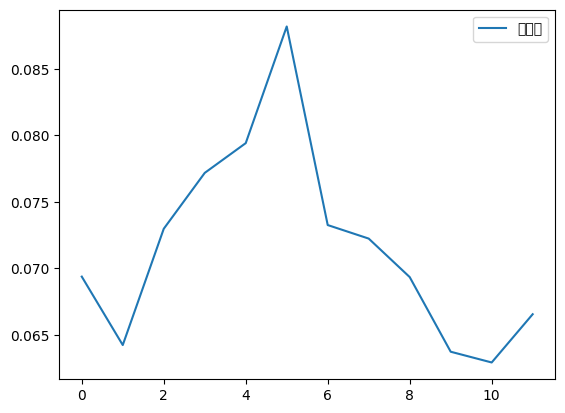

In [ ]:
df.plot()

In [ ]:
df.shape

(12, 2)

In [ ]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [ ]:
df.drop('index',axis = 1, inplace=True)
df.head()

,시간,사고율
0,2011-01-01,0.066547
1,2012-01-01,0.062921
2,2013-01-01,0.063729
3,2014-01-01,0.069339
4,2015-01-01,0.072231


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 84ms/step - loss: 0.0572 - val_loss: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.0495 - val_loss: 0.2065
Epoch 3/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0417 - val_loss: 0.2269
Epoch 4/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0343 - val_loss: 0.2644
Epoch 5/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0262 - val_loss: 0.3123
Epoch 6/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0222 - val_loss: 0.3413
Epoch 7/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0194 - val_loss: 0.3490
Epoch 8/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0189 - val_loss: 0.3425
Epoch 9/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0196 - val_loss: 0.3232
Epoch 10/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0198 - val_loss: 0.2994
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 30ms/step - loss: 0.1237
Mean Squared Error on Test Data: 0.12374074757099152


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 25ms/step
다음 달의 예측 값: 0.09411619


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'특약 기타': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 특약 기명피보험자1인 사고율

In [ ]:
df = pd.read_csv(dpath+'특약 기명피보험자1인 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

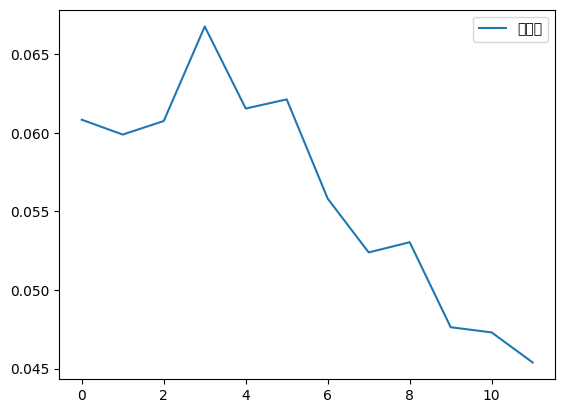

In [ ]:
df.plot()

In [ ]:
df.shape

(12, 2)

In [ ]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [ ]:
df.drop('index',axis = 1, inplace=True)
df.head()

,시간,사고율
0,2011-01-01,0.045383
1,2012-01-01,0.047294
2,2013-01-01,0.047626
3,2014-01-01,0.053033
4,2015-01-01,0.052385


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 92ms/step - loss: 0.0331 - val_loss: 0.1335
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0288 - val_loss: 0.1309
Epoch 3/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0246 - val_loss: 0.1141
Epoch 4/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0190 - val_loss: 0.0968
Epoch 5/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0171 - val_loss: 0.0850
Epoch 6/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0131 - val_loss: 0.0721
Epoch 7/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0114 - val_loss: 0.0524
Epoch 8/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0087 - val_loss: 0.0324
Epoch 9/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0072 - val_loss: 0.0199
Epoch 10/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0077 - val_loss: 0.0139
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 28ms/step - loss: 0.0133
Mean Squared Error on Test Data: 0.013346083462238312


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 25ms/step
다음 달의 예측 값: 0.049864795


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'특약 기명피보험자1인': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)

## 특약 가족 사고율

In [ ]:
df = pd.read_csv(dpath+'특약 가족 사고율.csv')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLA

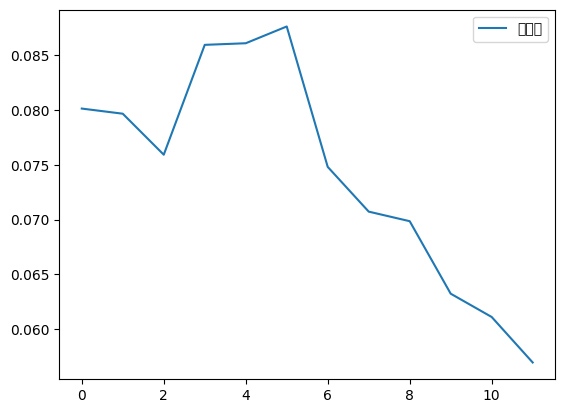

In [ ]:
df.plot()

In [ ]:
df.shape

(12, 2)

In [ ]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [ ]:
df.drop('index',axis = 1, inplace=True)
df.head()

,시간,사고율
0,2011-01-01,0.056957
1,2012-01-01,0.061108
2,2013-01-01,0.063234
3,2014-01-01,0.069848
4,2015-01-01,0.070721


In [ ]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.0225 - val_loss: 0.0051
Epoch 2/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0151 - val_loss: 0.0171
Epoch 3/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0157 - val_loss: 0.0248
Epoch 4/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0086 - val_loss: 0.0323
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0091 - val_loss: 0.0535
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0083 - val_loss: 0.0891
Epoch 7/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0056 - val_loss: 0.1249
Epoch 8/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0077 - val_loss: 0.1346
Epoch 9/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0062 - val_loss: 0.1276
Epoch 10/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0054 - val_loss: 0.1239
Epoch 11/

In [ ]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 49ms/step - loss: 0.1659
Mean Squared Error on Test Data: 0.16593672335147858


In [ ]:
# 다음 달데이터 예측을 위한 입력 데이터 생성
last_five_values = data_scaled[-3:]
input_data = np.array(last_five_values).reshape((1, 3, 1))

# LSTM 모델을 사용하여 다음 달 데이터 예측
predicted_value = model.predict(input_data)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print("다음 달의 예측 값:", predicted_value[0, 0])

1/1 [==============================] - 0s 42ms/step
다음 달의 예측 값: 0.0650772


In [ ]:
# 예측 결과를 DataFrame으로 변환
predicted_df = pd.DataFrame(data={'특약 가족': [predicted_value[0, 0]]})
existing_data = pd.read_csv('/content/drive/MyDrive/윤효정/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('/content/drive/MyDrive/윤효정/predicted_result.csv', index=False)